In [3]:
!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 21.6 MB/s eta 0:00:00:00:0100:01


In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, pairwise_distances, silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE, LocallyLinearEmbedding, MDS
import os
import cv2
from sklearn.decomposition import PCA
import matplotlib.image as mpimg
import random
from PIL import Image
from sklearn.cluster import KMeans

ImportError: DLL load failed while importing cv2: The specified module could not be found.

In [5]:
folder_path = 'grapevines_leaves'

# Create an empty list to store image data
image_data = []

In [6]:
# Load and preprocess the images
for filename in os.listdir(folder_path):
    if filename.endswith('.png'):
        img = cv2.imread(os.path.join(folder_path, filename), cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (64, 64))  # Resize the images to a consistent size
        image_data.append(img.flatten())

In [7]:
# Convert the list of image data into a NumPy array
image_data = np.array(image_data)

# Check if image_data has any NaN values
has_nan = np.isnan(image_data)
print(np.any(has_nan))
image_data.shape

False


(500, 4096)

In [8]:
#handle NaN values by mean imputation
if np.isnan(image_data).any():
    image_data[np.isnan(image_data)] = np.nanmean(image_data)

In [9]:
# Standardize the data (mean = 0, variance = 1)
mean = np.mean(image_data, axis=0)
std_dev = np.std(image_data, axis=0)
epsilon = 1e-10
std_dev[std_dev == 0] = epsilon
image_data = (image_data - mean) / std_dev

In [10]:
# Apply PCA to determine the number of components needed to preserve 95% of the variance
pca = PCA()
pca.fit(image_data)

PCA()

In [11]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

In [12]:
# Find the number of components that preserve 95% of the variance
num_components = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Number of components needed to preserve 95% of the variance: {num_components}")

Number of components needed to preserve 95% of the variance: 298


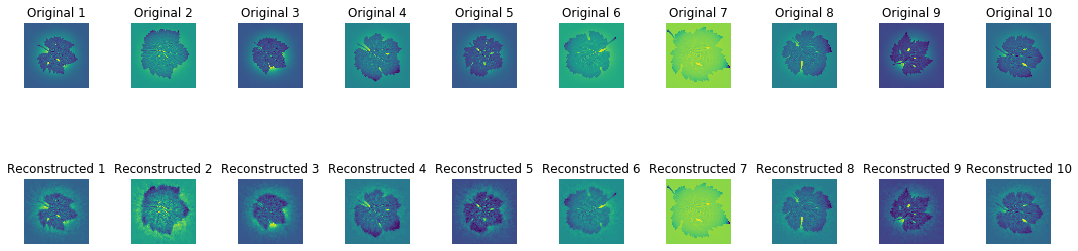

In [13]:
pca = PCA(n_components=0.95)
reduced_data = pca.fit_transform(image_data)

# Reconstruct the images back to the original space
reconstructed_data = pca.inverse_transform(reduced_data)

# Randomly select 10 images for plotting
sample_indices = np.random.choice(reconstructed_data.shape[0], 10, replace=False)

# Plot the original and reconstructed images
plt.figure(figsize=(15, 5))
for i, idx in enumerate(sample_indices):
    # Original Image
    plt.subplot(2, 10, i+1)
    plt.imshow(image_data[idx].reshape(64, 64))
    plt.axis('off')
    plt.title(f'Original {i+1}')

    # Reconstructed Image
    plt.subplot(2, 10, i+11)
    plt.imshow(reconstructed_data[idx].reshape(64, 64))
    plt.axis('off')
    plt.title(f'Reconstructed {i+1}')

plt.tight_layout()
plt.show()

In [14]:
# Apply PCA to reduce dimensionality to 2 dimensions
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(image_data)

# Calculate the explained variance ratios
explained_variance_ratios = pca.explained_variance_ratio_

for i, explained_variance_ratio in enumerate(explained_variance_ratios):
    print(f"Explained Variance for Principal Component {i+1}: {explained_variance_ratio*100:.2f}%")

Explained Variance for Principal Component 1: 16.47%
Explained Variance for Principal Component 2: 4.64%


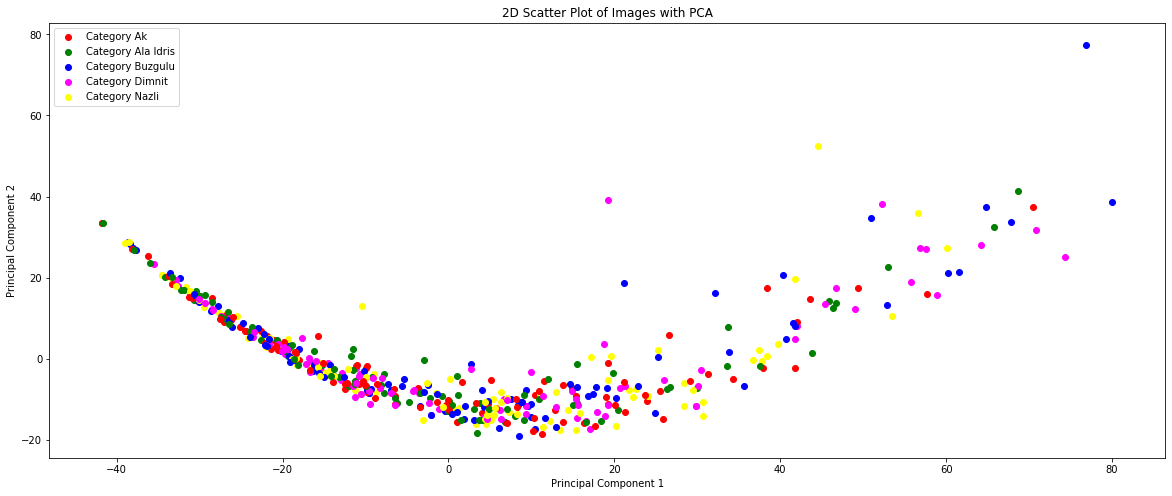

In [15]:
# Create a scatter plot
plt.figure(figsize=(20, 8))
categories = ['Ak', 'Ala Idris', 'Buzgulu', 'Dimnit', 'Nazli']
colors = ['red', 'green', 'blue', 'magenta', 'yellow']

for i, category in enumerate(categories):
    category_indices = [idx for idx, label in enumerate(categories) if label == category]
    plt.scatter(reduced_data[category_indices, 0], reduced_data[category_indices, 1], c=colors[i], label=f'Category {category}')

# Add every rock image to the plot
for i in range(len(image_data)):
    plt.scatter(reduced_data[i, 0], reduced_data[i, 1], c=colors[i % len(colors)], marker='o')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('2D Scatter Plot of Images with PCA')
plt.show()

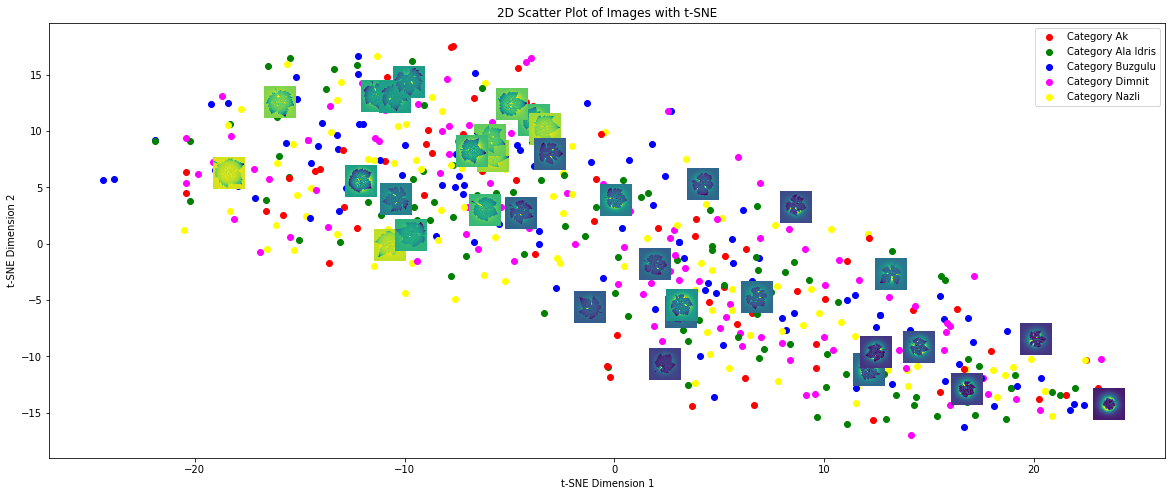

In [16]:
from matplotlib import offsetbox

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
reduced_data_tsne = tsne.fit_transform(image_data)

# Create a scatter plot
plt.figure(figsize=(20, 8))

for i, category in enumerate(categories):
    category_indices = [idx for idx, label in enumerate(categories) if label == category]
    plt.scatter(reduced_data_tsne[category_indices, 0], reduced_data_tsne[category_indices, 1], c=colors[i], label=f'Category {category}')

# Selectively embed rock images into the plot (resized to a small size)
for i in range(len(image_data)):
    # Condition to selectively embed only some rock images
    if i % 15 == 0:  # Adjust the condition based on your preference (e.g., every 5th image)
        image = image_data[i].reshape(64, 64)  # Adjust the reshape size based on your image dimensions
        small_image = cv2.resize(image, (32, 32), interpolation=cv2.INTER_AREA)  # Resize to a smaller size

        # Create an AnnotationBbox for each small image
        imagebox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(small_image),  # Use 'gray' for grayscale images
            (reduced_data_tsne[i, 0], reduced_data_tsne[i, 1]),  # Coordinates for the image
            boxcoords="data",
            frameon=False,
        )
        plt.gca().add_artist(imagebox)
    else:
        # For non-embedded images, just plot dots
        plt.scatter(reduced_data_tsne[i, 0], reduced_data_tsne[i, 1], c=colors[i % len(colors)], marker='o')

plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.title('2D Scatter Plot of Images with t-SNE')
plt.show()

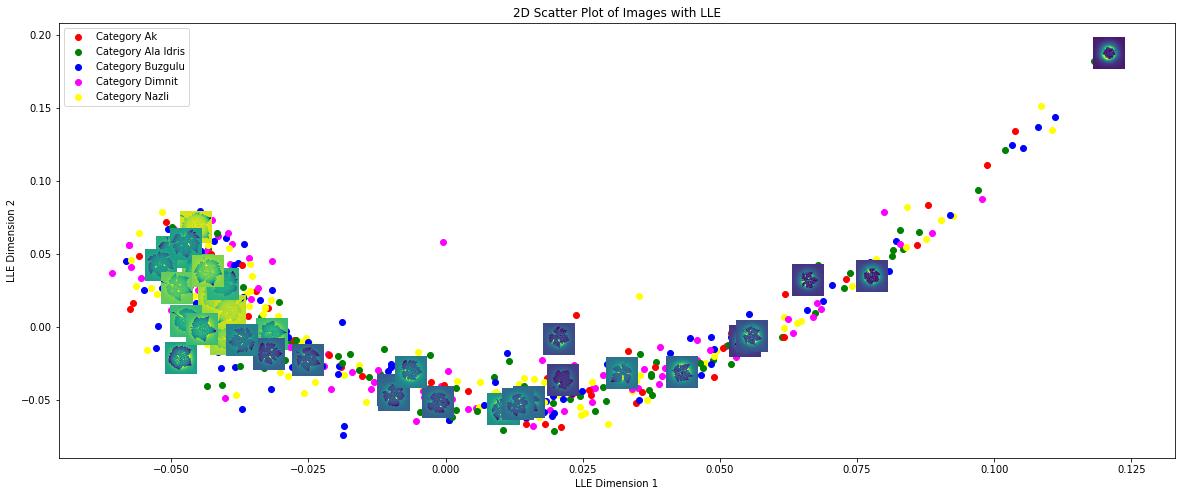

In [17]:

lle = LocallyLinearEmbedding(n_neighbors=30, n_components=5, method='standard')
reduced_data_lle = lle.fit_transform(image_data)

# Create a scatter plot
plt.figure(figsize=(20, 8))

for i, category in enumerate(categories):
    category_indices = [idx for idx, label in enumerate(categories) if label == category]
    plt.scatter(reduced_data_lle[category_indices, 0], reduced_data_lle[category_indices, 1], c=colors[i], label=f'Category {category}')

# Selectively embed rock images into the plot (resized to a small size)
for i in range(len(image_data)):
    # Condition to selectively embed only some rock images
    if i % 15 == 0:  # Adjust the condition based on your preference (e.g., every 5th image)
        image = image_data[i].reshape(64, 64)  # Adjust the reshape size based on your image dimensions
        small_image = cv2.resize(image, (32, 32), interpolation=cv2.INTER_AREA)  # Resize to a smaller size

        # Create an AnnotationBbox for each small image
        imagebox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(small_image),
            (reduced_data_lle[i, 0], reduced_data_lle[i, 1]),
            boxcoords="data",
            frameon=False,
        )
        plt.gca().add_artist(imagebox)
    else:
        # For non-embedded images, just plot dots
        plt.scatter(reduced_data_lle[i, 0], reduced_data_lle[i, 1], c=colors[i % len(colors)], marker='o')

plt.xlabel('LLE Dimension 1')
plt.ylabel('LLE Dimension 2')
plt.legend()
plt.title('2D Scatter Plot of Images with LLE')
plt.show()


In [18]:
# Calculate pairwise distance matrix using Euclidean distance
pairwise_distance_matrix = pairwise_distances(image_data, metric='euclidean')


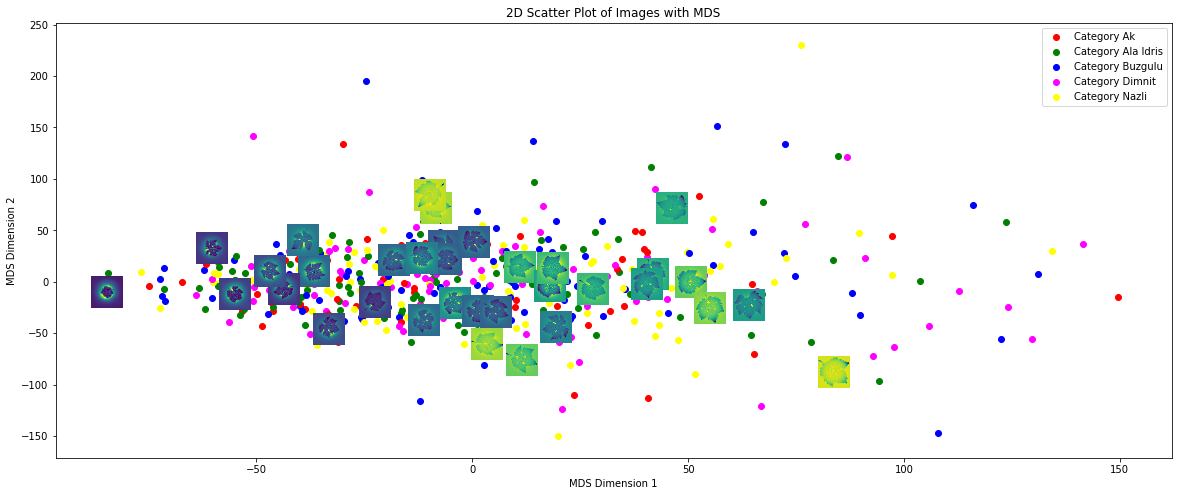

In [19]:

# Create an MDS model
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
reduced_data_mds = mds.fit_transform(pairwise_distance_matrix)

# Create a scatter plot
plt.figure(figsize=(20, 8))

for i, category in enumerate(categories):
    category_indices = [idx for idx, label in enumerate(categories) if label == category]
    plt.scatter(reduced_data_mds[category_indices, 0], reduced_data_mds[category_indices, 1], c=colors[i], label=f'Category {category}')

# Selectively embed rock images into the plot (resized to a small size)
for i in range(len(image_data)):
    # Condition to selectively embed only some rock images
    if i % 15 == 0:  # Adjust the condition based on your preference (e.g., every 15th image)
        image = image_data[i].reshape(64, 64)  # Adjust the reshape size based on your image dimensions
        small_image = cv2.resize(image, (32, 32), interpolation=cv2.INTER_AREA)  # Resize to a smaller size

        # Create an AnnotationBbox for each small image
        imagebox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(small_image),
            (reduced_data_mds[i, 0], reduced_data_mds[i, 1]),
            boxcoords="data",
            frameon=False,
        )
        plt.gca().add_artist(imagebox)
    else:
        # For non-embedded images, just plot dots
        plt.scatter(reduced_data_mds[i, 0], reduced_data_mds[i, 1], c=colors[i % len(colors)], marker='o')

plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.legend()
plt.title('2D Scatter Plot of Images with MDS')
plt.show()


In [20]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(image_data)

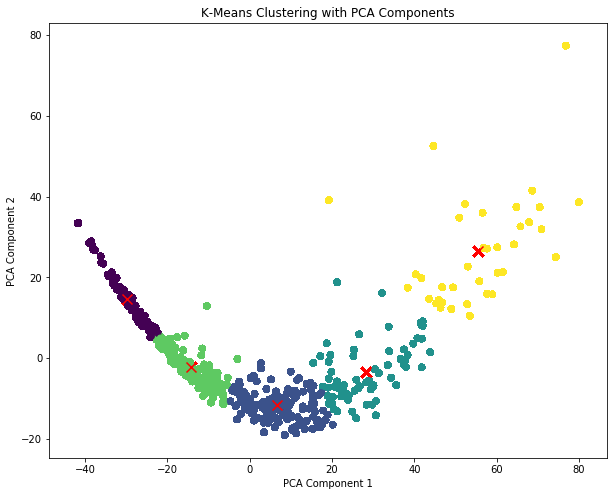

In [21]:
kmeans = KMeans(n_clusters=5, init="random", n_init=10, random_state=2)
clusters = kmeans.fit_predict(reduced_data)

colors = {0:'red', 1:'green', 2:'blue', 3:'magenta', 4:'yellow'}
centers = kmeans.cluster_centers_

# Create a scatter plot with EM clusters
plt.figure(figsize=(10, 8))

for i in range(len(reduced_data)):
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=100, label='Centroids')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering with PCA Components')
plt.show()

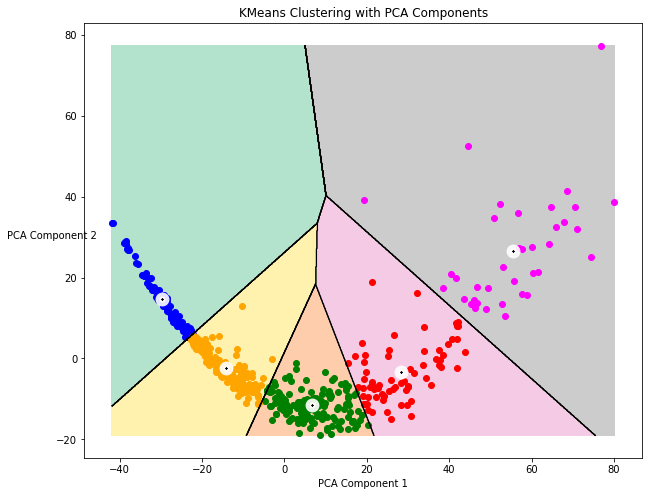

In [22]:
# Define colors for clusters
cluster_colors = ['b', 'g', 'r', 'orange', 'magenta']

def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    for i, color in enumerate(cluster_colors):
        cluster_indices = (clusters == i)
        plt.scatter(centroids[i, 0], centroids[i, 1],
                    marker='o', s=35, linewidths=8,
                    color=circle_color, zorder=10, alpha=0.9)
        plt.scatter(centroids[i, 0], centroids[i, 1],
                    marker='x', s=2, linewidths=12,
                    color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    
    for i, color in enumerate(cluster_colors):
        cluster_indices = (clusters == i)
        plt.scatter(X[cluster_indices][:, 0], X[cluster_indices][:, 1], c=color, marker='o')
        
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(10, 8))
plot_decision_boundaries(kmeans, reduced_data)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clustering with PCA Components')
plt.show()

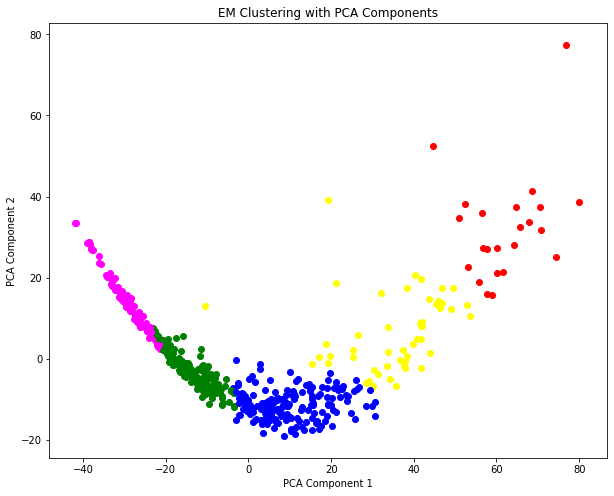

In [23]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=5, covariance_type='full', random_state=42)
clusters = gmm.fit_predict(reduced_data)

# Create a scatter plot with EM clusters
plt.figure(figsize=(10, 8))

for i in range(len(reduced_data)):
    plt.scatter(reduced_data[i, 0], reduced_data[i, 1], c=colors[clusters[i]], marker='o')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('EM Clustering with PCA Components')
plt.show()



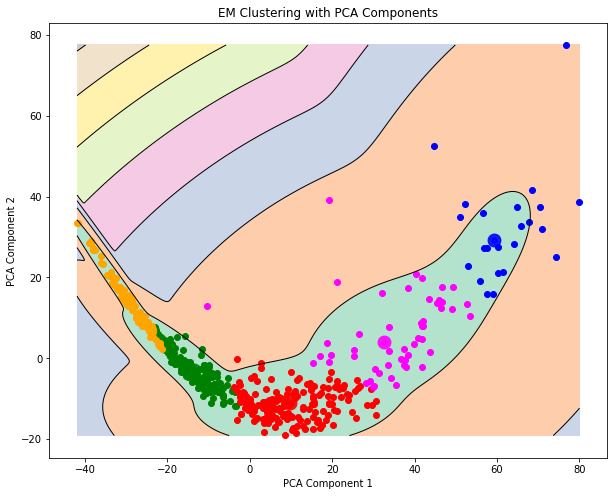

In [24]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(gmm, cluster_colors):
    for i, color in enumerate(cluster_colors):
        mean = gmm.means_[i]
        plt.scatter(mean[0], mean[1], marker='o', s=35, linewidths=8, color=color, zorder=10, alpha=0.9)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap="Pastel2")
    plt.contour(xx, yy, Z, linewidths=1, colors='k')
    
    for i, color in enumerate(cluster_colors):
        cluster_indices = (clusters == i)
        plt.scatter(X[cluster_indices][:, 0], X[cluster_indices][:, 1], c=color, marker='o')
        
    if show_centroids:
        plot_centroids(clusterer, cluster_colors)



plt.figure(figsize=(10, 8))
plot_decision_boundaries(gmm, reduced_data)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('EM Clustering with PCA Components')
plt.show()

In [25]:
# 2. Generate new samples from the GMM
n_samples = 20
generated_samples = gmm.sample(n_samples)  # This returns a tuple of generated samples and their component labels
generated_samples = generated_samples[0]  # Extract generated samples

generated_samples.shape

(20, 2)

In [26]:

# 3. Use PCA's inverse_transform to map the samples back to the original space
original_samples = pca.inverse_transform(generated_samples)

original_samples.shape

(20, 4096)

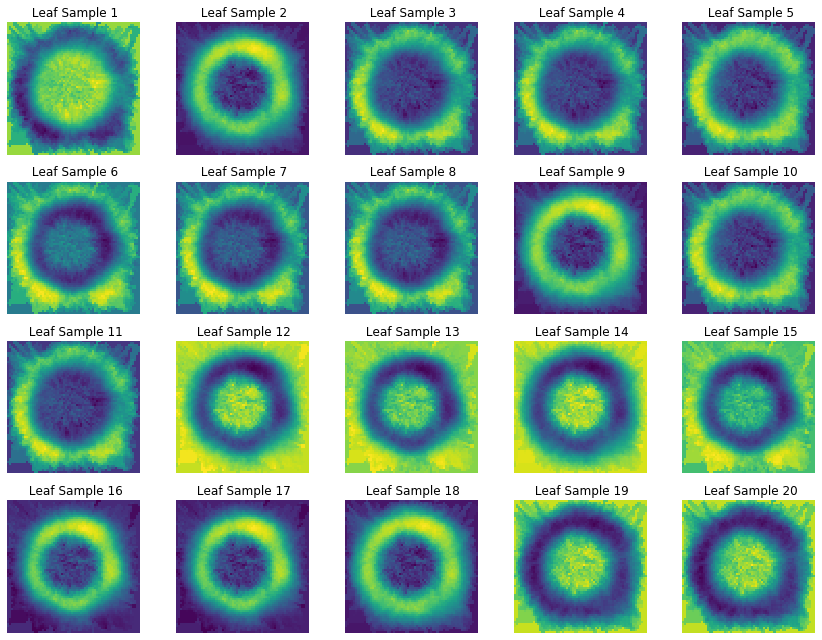

In [27]:
# 4. Visualize the generated leaves in the original image space
fig, axes = plt.subplots(4, 5, figsize=(12, 9))
axes = axes.ravel()

for i in range(n_samples):
    image = original_samples[i].reshape(64, 64)  # Assuming your original image size is 64x64
    axes[i].imshow(image)
    axes[i].set_title(f' Leaf Sample {i + 1}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [28]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras import layers, models, optimizers
from keras.utils import to_categorical
import time

# Load and preprocess the images
folder_path_train = 'grapevines_leaves'
folder_path_val = 'grapevines_leaves_val'

# Training data
train_image_data = []
train_labels = []

for filename in os.listdir(folder_path_train):
    if filename.endswith('.png'):
        img = cv2.imread(os.path.join(folder_path_train, filename), cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (64, 64))  # Resize the images to a consistent size
        train_image_data.append(img.flatten())
        train_labels.append(filename[0])  # Extract the first letter as the label

# Validation data
val_image_data = []
val_labels = []

for filename in os.listdir(folder_path_val):
    if filename.endswith('.png'):
        img = cv2.imread(os.path.join(folder_path_val, filename), cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (64, 64))  # Resize the images to a consistent size
        val_image_data.append(img.flatten())
        val_labels.append(filename[0])  # Extract the first letter as the label

# Convert data and labels to numpy arrays
train_image_data = np.array(train_image_data)
train_labels = np.array(train_labels)
val_image_data = np.array(val_image_data)
val_labels = np.array(val_labels)

# Encode labels
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
val_labels_encoded = label_encoder.transform(val_labels)

train_labels_one_hot = to_categorical(train_labels_encoded)
val_labels_one_hot = to_categorical(val_labels_encoded)

# Build the neural network model
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(64 * 64,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(8, activation='relu'))  # Add a hidden layer with ReLU activation
model.add(layers.Dense(3, activation='softmax'))  # Output layer with 3 neurons for rock categories

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Measure training time
start_time = time.time()

# Train the model
history = model.fit(train_image_data, train_labels_one_hot, epochs=10, batch_size=32, validation_data=(val_image_data, val_labels_one_hot))

# Calculate training time
training_time = time.time() - start_time
print(f"Training Time: {training_time} seconds")


Using TensorFlow backend.
C:\Users\HOME\Anaconda3\lib\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.16) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


AttributeError: module 'tensorflow' has no attribute 'get_default_graph'